In [9]:
import xarray as xr

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:

dfesm=pd.read_excel("https://github.com/benmsanderson/esmperspective/raw/main/dfesm.xlsx",index_col=0)
dfhist=pd.read_excel("https://github.com/benmsanderson/esmperspective/raw/main/dfhist.xlsx",index_col=0)


In [12]:
dfesm

,ACCESS-ESM1-5,BCC-CSM2-MR,CESM2,CNRM-ESM2-1,CanESM5,CanESM5-CanOE,MIROC-ES2L,MPI-ESM1-2-LR,MRI-ESM2-0,NorESM2-LM,UKESM1-0-LL
YEARS,,,,,,,,,,,
1850,0.1008,-0.17514,0.06198,0.18806,0.01518,0.096,-0.0766,-0.25864,0.09344,0.14006,-0.09314
1851,0.1948,-0.21314,0.04198,0.14106,-0.25782,0.114,-0.0086,-0.15164,-0.02656,0.00206,0.04886
1852,0.1768,-0.10914,-0.14302,0.14806,-0.25682,0.130,-0.1266,-0.12064,0.06944,0.19806,-0.10214
1853,-0.0532,-0.02614,-0.11402,0.12206,-0.15182,-0.062,-0.1506,-0.05164,0.01144,0.26806,-0.15114
1854,-0.0842,-0.03814,0.00098,0.11606,-0.03282,-0.231,-0.1426,0.13536,0.05644,-0.11294,-0.06014
...,...,...,...,...,...,...,...,...,...,...,...
2010,0.5618,0.93286,1.35298,0.53706,1.57118,1.703,0.5054,0.78736,0.74844,0.64406,0.98386
2011,0.6678,1.02786,1.27298,0.63906,1.67018,1.576,0.7664,1.03336,0.76944,0.53106,1.14486
2012,0.7418,1.09086,1.03598,0.63306,1.85718,1.685,0.8644,1.03736,0.82844,0.47806,1.00186


In [13]:

c=pd.read_csv('https://github.com/benmsanderson/esmperspective/raw/main/cmip6_esm-hist_co2s.csv',index_col=0)
c = c.reindex(sorted(c.columns), axis=1)

In [14]:
ghg_cmip6 = pd.read_csv('https://github.com/benmsanderson/esmperspective/raw/main/Supplementary_Table_UoM_GHGConcentrations-1-1-0_annualmeans_v2.csv', skiprows=21, index_col=0)
ghg_cmip6['CO2']

v YEARS/GAS >
1850    284.32
1851    284.45
1852    284.60
1853    284.73
1854    284.85
         ...  
2010    388.72
2011    390.94
2012    393.02
2013    395.72
2014    397.55
Name: CO2, Length: 165, dtype: float64

In [15]:
models=c.columns

{'EC-Earth3-CC': np.float64(431.8550160313155),
 'GFDL-ESM4': np.float64(419.3452922621145),
 'CESM2': np.float64(415.0675708752133),
 'UKESM1-0-LL': np.float64(412.9112176602771),
 'CanESM5': np.float64(410.0534728046186),
 'CanESM5-CanOE': np.float64(409.7569814178589),
 'NorESM2-LM': np.float64(406.5741312010064),
 'MPI-ESM1-2-LR': np.float64(406.32757617928064),
 'ACCESS-ESM1-5': np.float64(392.2074114410602),
 'MIROC-ES2L': np.float64(385.9967796252242),
 'MRI-ESM2-0': np.float64(381.20098264137863),
 'BCC-CSM2-MR': np.float64(368.309187682758),
 'CNRM-ESM2-1': np.float64(348.0200539224229)}

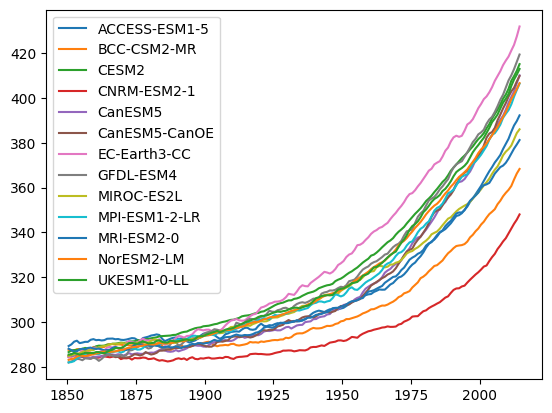

In [16]:
c.plot()
maxco2 = {}
for model in models:
    maxco2[model] = c[model].max()
models_sorted = {k: v for k, v in sorted(maxco2.items(), key=lambda item: item[1], reverse=True)}
models_sorted

In [17]:
palette = [
    '#6929c4',
    '#1192e8',
    '#005d5d',
    '#9f1853',
    '#fa4d56',
    '#570408',
    '#198038',
    '#002d9c',
    '#ee538b',
    '#b28600',
    '#009d9a',
    '#012749',
    '#8a3800',
]

colors=dict(zip(models_sorted.keys(), palette))

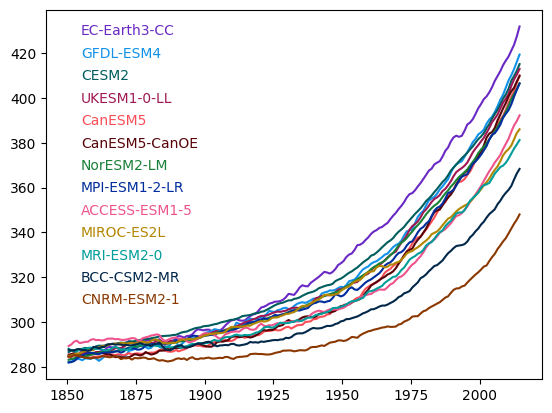

In [18]:
for i, model in enumerate(models_sorted):
    plt.plot(np.arange(1850.5, 2015), c[model], color=colors[model])
    plt.text(1855, 428-i*10, model, color=colors[model])

In [19]:
from urllib.request import urlopen

# load up Cowtan and Way data remotely
url = 'http://www-users.york.ac.uk/~kdc3/papers/coverage2013/had4_krig_annual_v2_0_0.txt'
response = urlopen(url)

CW = np.loadtxt(response)
CW[:,0]

array([1850., 1851., 1852., 1853., 1854., 1855., 1856., 1857., 1858.,
       1859., 1860., 1861., 1862., 1863., 1864., 1865., 1866., 1867.,
       1868., 1869., 1870., 1871., 1872., 1873., 1874., 1875., 1876.,
       1877., 1878., 1879., 1880., 1881., 1882., 1883., 1884., 1885.,
       1886., 1887., 1888., 1889., 1890., 1891., 1892., 1893., 1894.,
       1895., 1896., 1897., 1898., 1899., 1900., 1901., 1902., 1903.,
       1904., 1905., 1906., 1907., 1908., 1909., 1910., 1911., 1912.,
       1913., 1914., 1915., 1916., 1917., 1918., 1919., 1920., 1921.,
       1922., 1923., 1924., 1925., 1926., 1927., 1928., 1929., 1930.,
       1931., 1932., 1933., 1934., 1935., 1936., 1937., 1938., 1939.,
       1940., 1941., 1942., 1943., 1944., 1945., 1946., 1947., 1948.,
       1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957.,
       1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966.,
       1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975.,
       1976., 1977.,

In [156]:
c_fut=c.copy()
c_fut.index=np.arange(2015.5,2180.5)
c_fut[:]=np.nan

c_fut['ACCESS-ESM1-5'][2050.5]=540
c_fut['ACCESS-ESM1-5'][2080.5]=850
c_fut['ACCESS-ESM1-5'][2100.5]=1115

c_fut['MIROC-ES2L'][2050.5]=510
c_fut['MIROC-ES2L'][2080.5]=790
c_fut['MIROC-ES2L'][2100.5]=1005

c_fut['MPI-ESM1-2-LR'][2050.5]=540   
c_fut['MPI-ESM1-2-LR'][2080.5]=850
c_fut['MPI-ESM1-2-LR'][2100.5]=1090

c_fut['CESM2'][2050.5]=560
c_fut['CESM2'][2080.5]=820
c_fut['CESM2'][2100.5]=1070

c_fut['UKESM1-0-LL'][2050.5]=570
c_fut['UKESM1-0-LL'][2080.5]=880
c_fut['UKESM1-0-LL'][2100.5]=1170

c_comb=pd.concat([c,c_fut])





/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_50086/1122815131.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  c_fut['ACCESS-ESM1-5'][2050.5]=540
/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_50086/1122815131.py

In [157]:
c_comb.index

Index([1850.5, 1851.5, 1852.5, 1853.5, 1854.5, 1855.5, 1856.5, 1857.5, 1858.5,
       1859.5,
       ...
       2170.5, 2171.5, 2172.5, 2173.5, 2174.5, 2175.5, 2176.5, 2177.5, 2178.5,
       2179.5],
      dtype='float64', length=330)

In [158]:
c_comb=c_comb.interpolate(method='cubic',axis=0)

In [144]:
c_fut['ACCESS-ESM1-5'][2040.5]

np.float64(nan)

In [75]:
ghg_future = pd.read_csv('CAMtr_volume_mixing_ratio.SSP585.txt', index_col=0, delim_whitespace=True, skiprows=0)

/var/folders/pd/218my53900s1gy0k6lcyvjxm0000gn/T/ipykernel_50086/3322542190.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ghg_future = pd.read_csv('CAMtr_volume_mixing_ratio.SSP585.txt', index_col=0, delim_whitespace=True, skiprows=0)


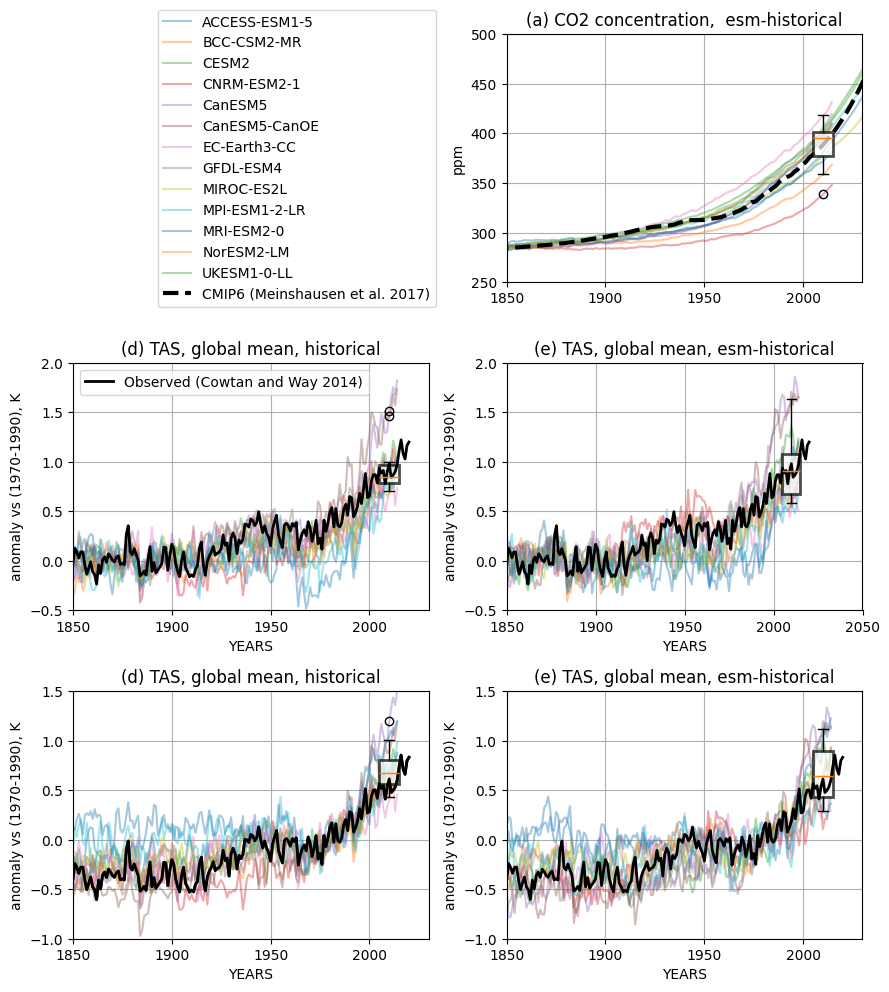

In [168]:
fig, ax= plt.subplots(3, 2,figsize=[9,10])
c_comb.plot(ax=ax[0,1],alpha=0.4)

ax[0,0].set_visible(False)

#for i, model in enumerate(models_sorted):
#    ax[0,1].plot(np.arange(1850.5, 2015), c[model], color=colors[model])
#    ax[0,1].text(1855, 428-i*10, model, color=colors[model])
#ghg_future.iloc[:,0].plot(ax=ax[0,1],color='k',linestyle='--',label='SSP5-8.5 (Meinshausen et al. 2017)',lw=3)

ax[0,1].plot(np.arange(1765,2500), ghg_future.iloc[1:,0].values.astype(float), color='k',linestyle='--', label='CMIP6 (Meinshausen et al. 2017)', lw=3)
ax[0,1].legend(pc,{'CMIP6 (Meinshausen et al. 2017)'})
bplot=ax[0,1].boxplot(c.iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
ax[0,1].grid()
ax[0,1].set_ylabel('ppm')
ax[0,1].set_title('(a) CO2 concentration,  esm-historical')
ax[0,1].set_xlim([1850,2030])
ax[0,1].set_ylim([250,500])

ax[0,1].set_xticks(np.arange(1850,2030,50))
ax[0,1].set_xticklabels(np.arange(1850,2030,50))


(dfhist-dfhist.loc[1850:1900].mean()).plot(ax=ax[1,0],legend=False,alpha=0.4)
pp=ax[2,0].plot(CW[:,0],CW[:,1]-np.mean(CW[120:140,1]),color='k',lw=2)

ax[1,0].grid()
ax[1,0].set_ylabel('anomaly vs (1970-1990), K')
ax[1,0].set_title('(d) TAS, global mean, historical')
ax[1,0].legend(pp,{'Observed (Cowtan and Way 2014)'})
bplot=ax[1,0].boxplot((dfhist-dfhist.loc[1850:1900].mean()).iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
pp=ax[1,0].plot(CW[:,0],CW[:,1]-np.mean(CW[:50,1]),color='k',lw=2)
ax[1,0].set_ylim([-.5,2])
ax[1,0].set_xlim([1850,2030])
ax[1,0].set_xticks(np.arange(1850,2030,50))
ax[1,0].set_xticklabels(np.arange(1850,2030,50))

(dfesm-dfesm.loc[1850:1900].mean()).plot(ax=ax[1,1],legend=False,alpha=0.4)
ax[1,1].grid()
ax[1,1].set_ylabel('anomaly vs (1970-1990), K')
ax[1,1].set_title('(e) TAS, global mean, esm-historical')
#ax[2,1].legend(pp,{'Observed (Cowtan and Way 2014)'})
bplot=ax[1,1].boxplot((dfesm-dfesm.loc[1850:1900].mean()).iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
pp=ax[1,1].plot(CW[:,0],CW[:,1]-np.mean(CW[:50,1]),color='k',lw=2)
ax[1,1].set_ylim([-.5,2])
ax[1,1].set_xlim([1850,2030])
ax[1,1].set_xticks(np.arange(1850,2100,50))
ax[1,1].set_xticklabels(np.arange(1850,2100,50))



(dfhist-dfhist.loc[1970:1990].mean()).plot(ax=ax[2,0],legend=False,alpha=0.4)
ax[2,0].grid()
ax[2,0].set_ylabel('anomaly vs (1970-1990), K')
ax[2,0].set_title('(d) TAS, global mean, historical')
#ax[2,0].legend(pp,{'Observed (Cowtan and Way 2014)'})
bplot=ax[2,0].boxplot((dfhist-dfhist.loc[1970:1990].mean()).iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
pp=ax[2,0].plot(CW[:,0],CW[:,1]-np.mean(CW[120:140,1]),color='k',lw=2)
ax[2,0].set_ylim([-1,1.5])
ax[2,0].set_xlim([1850,2030])
ax[2,0].set_xticks(np.arange(1850,2030,50))
ax[2,0].set_xticklabels(np.arange(1850,2030,50))

(dfesm-dfesm.loc[1970:1990].mean()).plot(ax=ax[2,1],legend=False,alpha=0.4)
ax[2,1].grid()
ax[2,1].set_ylabel('anomaly vs (1970-1990), K')
ax[2,1].set_title('(e) TAS, global mean, esm-historical')
#ax[2,1].legend(pp,{'Observed (Cowtan and Way 2014)'})
bplot=ax[2,1].boxplot((dfesm-dfesm.loc[1970:1990].mean()).iloc[-10:,:].mean(),positions=[2010.],widths=10,patch_artist=True)
bplot['boxes'][0].set_facecolor('w')
bplot['boxes'][0].set_alpha(0.7)
bplot['boxes'][0].set_linewidth(2)
pp=ax[2,1].plot(CW[:,0],CW[:,1]-np.mean(CW[120:140,1]),color='k',lw=2)
ax[2,1].set_ylim([-1,1.5])
ax[2,1].set_xlim([1850,2030])
ax[2,1].set_xticks(np.arange(1850,2030,50))
ax[2,1].set_xticklabels(np.arange(1850,2030,50))

fig.tight_layout()
ax[0,1].legend(loc='center left', bbox_to_anchor=(-1.0, 0.5))

fig.savefig('fig4.png', dpi=300)


##
##           Non
1765     277.913
1766     277.958
1767     278.017
1768     278.078
          ...   
2495    2013.010
2496    2012.340
2497    2011.670
2498    2011.010
2499    2010.360
Name: year[1], Length: 736, dtype: object

In [27]:
c

,ACCESS-ESM1-5,BCC-CSM2-MR,CESM2,CNRM-ESM2-1,CanESM5,CanESM5-CanOE,EC-Earth3-CC,GFDL-ESM4,MIROC-ES2L,MPI-ESM1-2-LR,MRI-ESM2-0,NorESM2-LM,UKESM1-0-LL
1850.5,289.323949,287.609621,286.606383,284.539370,284.306246,285.115101,284.649665,281.981829,284.892951,282.032381,288.111308,283.138153,285.485605
1851.5,290.047556,287.335803,287.294510,284.705149,284.648223,285.745234,283.826086,282.446776,285.198559,282.157038,287.487359,283.533835,285.619509
1852.5,291.267131,287.264283,287.526227,285.328024,285.054415,285.786069,283.191224,282.979224,285.583492,282.587554,286.859536,283.816784,286.320897
1853.5,291.694260,287.892043,287.595117,285.022142,284.917620,285.676236,283.397294,283.643833,285.966878,283.818493,286.930901,284.591301,285.893006
1854.5,290.618596,287.981252,287.780005,284.727234,284.588361,285.111638,286.188475,283.452149,286.057927,284.611305,287.850971,285.030836,285.473365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010.5,381.762534,358.980651,404.079578,339.556748,397.902917,400.589236,418.441024,407.805397,377.162112,394.575951,372.939668,396.488640,401.707084
2011.5,384.909265,360.706089,407.628307,341.633726,400.494404,402.906819,421.121780,410.067130,378.759853,397.119428,375.149186,399.407578,405.340736
2012.5,387.704614,363.597061,409.725492,343.860191,402.970924,404.548289,423.665911,412.854253,381.549313,400.568086,377.383977,401.723289,408.224872
2013.5,389.679426,366.266560,412.085746,345.697922,406.616623,407.348762,427.417993,416.141035,384.323247,403.538854,379.227235,403.987017,410.408114


In [37]:
c['ACCESS-ESM1-5']

1850.5    289.323949
1851.5    290.047556
1852.5    291.267131
1853.5    291.694260
1854.5    290.618596
             ...    
2010.5    381.762534
2011.5    384.909265
2012.5    387.704614
2013.5    389.679426
2014.5    392.207411
Name: ACCESS-ESM1-5, Length: 165, dtype: float64

<Axes: >

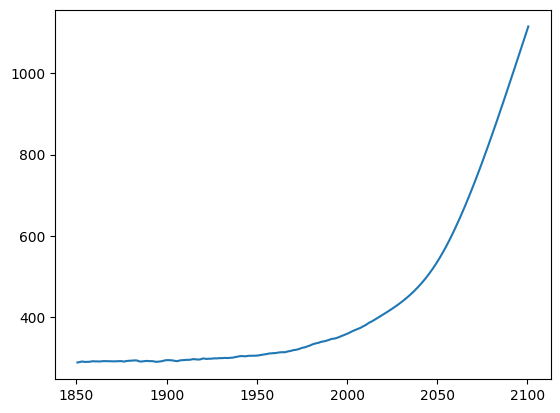

In [57]:
c_comb['ACCESS-ESM1-5'].interpolate(method='cubic').plot()